In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
# Mount the google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [ ]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [ ]:
# load the stock news data
data = pd.read_csv(".......csv",usecols=[1,2])

In [ ]:
# Let's view the dataset 
data

,sentiment,text
0,sad,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...
...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,anger,corona virus i implore that you cease activity...
3087,joy,issa date once lockdown ends inshaallah (and c...
3088,sad,the death toll due to covid 19 rose to 31 in j...


In [ ]:
# dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  3090 non-null   object
 1   text       3090 non-null   object
dtypes: object(2)
memory usage: 48.4+ KB


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [ ]:
# Let's remove punctuations from our dataset 
data['Text Without Punctuation'] = data['text'].apply(remove_punc)

In [ ]:
data

,sentiment,text,Text Without Punctuation
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...
...,...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...,today at 02 30pm a 54 year old bangladeshi mal...
3086,anger,corona virus i implore that you cease activity...,corona virus i implore that you cease activity...
3087,joy,issa date once lockdown ends inshaallah (and c...,issa date once lockdown ends inshaallah and co...
3088,sad,the death toll due to covid 19 rose to 31 in j...,the death toll due to covid 19 rose to 31 in j...


In [ ]:
data['text'][2]

'will nature conservation remain a priority in post corona bangladesh | the daily star'

In [ ]:
data['Text Without Punctuation'][2]

'will nature conservation remain a priority in post corona bangladesh  the daily star'

In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('not')


In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 1 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# apply pre-processing to the text column
data['Text Without Punc & Stopwords'] = data['Text Without Punctuation'].apply(preprocess)

In [ ]:
data['text'][0]

'agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals'

In [ ]:
data['Text Without Punc & Stopwords'][0]

['agree',
 'poor',
 'india',
 'treated',
 'badly',
 'poors',
 'seek',
 'living',
 'singapore',
 'treated',
 'like',
 'citizens',
 'given',
 'free',
 'medical',
 'treatment',
 'given',
 'food',
 'daily',
 'sim',
 'cards',
 'call',
 'home',
 'tell',
 'family',
 'fine',
 'covid',
 'case',
 'treated',
 'foc',
 'hospitals']

In [ ]:
data

,sentiment,text,Text Without Punctuation,Text Without Punc & Stopwords
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,"[agree, poor, india, treated, badly, poors, se..."
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,"[could, spent, cutie, vc, sakshis, coast, cros..."
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,"[nature, conservation, remain, priority, post,..."
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,"[coronavirus, disappearing, italy, show, intel..."
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,"[uk, records, lowest, daily, virus, death, tol..."
...,...,...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...,today at 02 30pm a 54 year old bangladeshi mal...,"[today, pm, year, old, bangladeshi, male, admi..."
3086,anger,corona virus i implore that you cease activity...,corona virus i implore that you cease activity...,"[corona, virus, implore, cease, activity, apri..."
3087,joy,issa date once lockdown ends inshaallah (and c...,issa date once lockdown ends inshaallah and co...,"[issa, date, lockdown, ends, inshaallah, coron..."
3088,sad,the death toll due to covid 19 rose to 31 in j...,the death toll due to covid 19 rose to 31 in j...,"[death, toll, due, covid, rose, jammu, kashmir..."


In [ ]:
# join the words into a string
data['Text Without Punc & Stopwords Joined'] = data['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

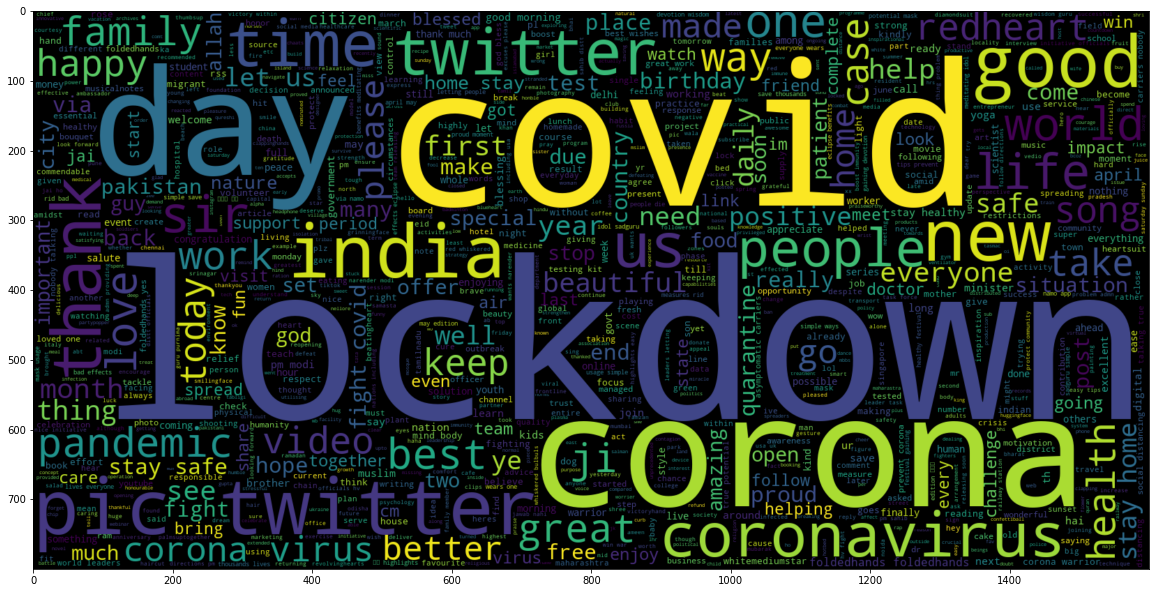

In [ ]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data[data['sentiment']=='joy']['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

In [ ]:
data

,sentiment,text,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,"[agree, poor, india, treated, badly, poors, se...",agree poor india treated badly poors seek livi...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,"[could, spent, cutie, vc, sakshis, coast, cros...",could spent cutie vc sakshis coast crossing re...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,"[nature, conservation, remain, priority, post,...",nature conservation remain priority post coron...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,"[coronavirus, disappearing, italy, show, intel...",coronavirus disappearing italy show intellectu...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,"[uk, records, lowest, daily, virus, death, tol...",uk records lowest daily virus death toll since...
...,...,...,...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...,today at 02 30pm a 54 year old bangladeshi mal...,"[today, pm, year, old, bangladeshi, male, admi...",today pm year old bangladeshi male admitted tr...
3086,anger,corona virus i implore that you cease activity...,corona virus i implore that you cease activity...,"[corona, virus, implore, cease, activity, apri...",corona virus implore cease activity april st n...
3087,joy,issa date once lockdown ends inshaallah (and c...,issa date once lockdown ends inshaallah and co...,"[issa, date, lockdown, ends, inshaallah, coron...",issa date lockdown ends inshaallah corona redh...
3088,sad,the death toll due to covid 19 rose to 31 in j...,the death toll due to covid 19 rose to 31 in j...,"[death, toll, due, covid, rose, jammu, kashmir...",death toll due covid rose jammu kashmir third ...


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# word_tokenize is used to break up a string into words
print(data['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(data['Text Without Punc & Stopwords Joined'][0]))

agree poor india treated badly poors seek living singapore treated like citizens given free medical treatment given food daily sim cards call home tell family fine covid case treated foc hospitals
['agree', 'poor', 'india', 'treated', 'badly', 'poors', 'seek', 'living', 'singapore', 'treated', 'like', 'citizens', 'given', 'free', 'medical', 'treatment', 'given', 'food', 'daily', 'sim', 'cards', 'call', 'home', 'tell', 'family', 'fine', 'covid', 'case', 'treated', 'foc', 'hospitals']


In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in data['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 44


In [ ]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in data['Text Without Punc & Stopwords Joined'] ]
tweets_length

[31,
 8,
 9,
 9,
 11,
 12,
 28,
 5,
 25,
 24,
 13,
 5,
 19,
 20,
 9,
 30,
 6,
 7,
 8,
 7,
 17,
 2,
 28,
 30,
 5,
 16,
 6,
 7,
 12,
 6,
 12,
 7,
 11,
 18,
 25,
 14,
 15,
 12,
 6,
 11,
 19,
 9,
 23,
 12,
 12,
 14,
 14,
 25,
 8,
 12,
 10,
 25,
 23,
 5,
 8,
 9,
 16,
 9,
 7,
 9,
 29,
 22,
 4,
 6,
 23,
 21,
 24,
 9,
 23,
 11,
 7,
 9,
 18,
 25,
 19,
 2,
 16,
 11,
 6,
 8,
 16,
 11,
 6,
 5,
 27,
 6,
 28,
 18,
 16,
 12,
 15,
 23,
 11,
 16,
 21,
 14,
 15,
 2,
 15,
 18,
 4,
 6,
 19,
 8,
 22,
 22,
 13,
 9,
 22,
 9,
 16,
 13,
 18,
 9,
 14,
 17,
 2,
 17,
 14,
 18,
 22,
 8,
 20,
 8,
 9,
 24,
 25,
 10,
 5,
 7,
 14,
 8,
 7,
 26,
 11,
 29,
 24,
 12,
 18,
 18,
 29,
 15,
 27,
 7,
 23,
 25,
 15,
 31,
 23,
 28,
 9,
 23,
 12,
 16,
 19,
 16,
 1,
 25,
 12,
 15,
 23,
 6,
 9,
 17,
 25,
 21,
 9,
 24,
 16,
 23,
 24,
 29,
 6,
 3,
 21,
 11,
 13,
 24,
 3,
 10,
 10,
 14,
 29,
 11,
 28,
 8,
 4,
 26,
 8,
 4,
 24,
 22,
 28,
 10,
 20,
 17,
 26,
 10,
 18,
 12,
 5,
 3,
 8,
 10,
 19,
 7,
 6,
 5,
 8,
 8,
 4,
 9,
 22,
 11,
 24,

In [ ]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 100)
fig.show()

In [ ]:
data

,sentiment,text,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,"[agree, poor, india, treated, badly, poors, se...",agree poor india treated badly poors seek livi...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,"[could, spent, cutie, vc, sakshis, coast, cros...",could spent cutie vc sakshis coast crossing re...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,"[nature, conservation, remain, priority, post,...",nature conservation remain priority post coron...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,"[coronavirus, disappearing, italy, show, intel...",coronavirus disappearing italy show intellectu...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,"[uk, records, lowest, daily, virus, death, tol...",uk records lowest daily virus death toll since...
...,...,...,...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...,today at 02 30pm a 54 year old bangladeshi mal...,"[today, pm, year, old, bangladeshi, male, admi...",today pm year old bangladeshi male admitted tr...
3086,anger,corona virus i implore that you cease activity...,corona virus i implore that you cease activity...,"[corona, virus, implore, cease, activity, apri...",corona virus implore cease activity april st n...
3087,joy,issa date once lockdown ends inshaallah (and c...,issa date once lockdown ends inshaallah and co...,"[issa, date, lockdown, ends, inshaallah, coron...",issa date lockdown ends inshaallah corona redh...
3088,sad,the death toll due to covid 19 rose to 31 in j...,the death toll due to covid 19 rose to 31 in j...,"[death, toll, due, covid, rose, jammu, kashmir...",death toll due covid rose jammu kashmir third ...


In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in data['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)


In [ ]:
list_of_words

['agree',
 'poor',
 'india',
 'treated',
 'badly',
 'poors',
 'seek',
 'living',
 'singapore',
 'treated',
 'like',
 'citizens',
 'given',
 'free',
 'medical',
 'treatment',
 'given',
 'food',
 'daily',
 'sim',
 'cards',
 'call',
 'home',
 'tell',
 'family',
 'fine',
 'covid',
 'case',
 'treated',
 'foc',
 'hospitals',
 'could',
 'spent',
 'cutie',
 'vc',
 'sakshis',
 'coast',
 'crossing',
 'republik',
 'nature',
 'conservation',
 'remain',
 'priority',
 'post',
 'corona',
 'bangladesh',
 'daily',
 'star',
 'coronavirus',
 'disappearing',
 'italy',
 'show',
 'intellectuals',
 'say',
 'lockdowns',
 'not',
 'work',
 'uk',
 'records',
 'lowest',
 'daily',
 'virus',
 'death',
 'toll',
 'since',
 'start',
 'lockdown',
 'govt',
 'joe',
 'bidens',
 'coronavirus',
 'web',
 'address',
 'lands',
 'donation',
 'page',
 'campaign',
 'profiting',
 'fear',
 'demopos',
 'respected',
 'sir',
 'telangana',
 'private',
 'teachers',
 'lecturers',
 'horrible',
 'situations',
 'due',
 'covid',
 'mainly',
 

In [ ]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

10129

In [ ]:
# split the data into test and train 
X = data['Text Without Punc & Stopwords']
yd = data.iloc[:,0]



In [ ]:
yd

0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yt = le.fit_transform(yd)

In [ ]:
y=[]

In [ ]:
for i in range(0,3090):
  if(yt[i]==2):
    y.append(1)
  else:
    y.append(0)

In [ ]:
set(y)

{0, 1}

In [ ]:
len(y)

3090

In [ ]:
y

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train.shape

(2781,)

In [ ]:
X_test.shape

(309,)

In [ ]:
X_train

2629    [mtmar, daily, sports, minute, discussing, spo...
1654    [cretins, pushed, old, ladies, haste, stockpil...
1170    [thanks, time, time, update, grateful, deptt, ...
969     [watched, rosie, written, roddy, doyle, makes,...
212     [nice, initiative, officials, hv, fight, covid...
                              ...                        
1635    [distracting, much, possible, overwhelming, sa...
341     [neville, accuses, boris, johnson, zig, zaggin...
834           [going, strength, strength, covid, gurgaon]
72      [orange, haired, orangutan, said, last, week, ...
986     [new, coronavirus, losing, potency, top, itali...
Name: Text Without Punc & Stopwords, Length: 2781, dtype: object

In [ ]:
X_test

846     [grand, princess, arrives, anxious, oakland, c...
1421    [worlds, fastest, supercomputer, identifies, c...
2417    [im, sick, tired, hearing, coronavirus, cancel...
2436                                   [home, stay, safe]
2366    [utc, pune, woman, makes, indias, st, covid, t...
                              ...                        
1830                  [kill, man, hide, bad, coronavirus]
1454    [government, not, haha, april, fools, corona, ...
732     [currently, pakistan, confronting, three, majo...
2572      [recovery, rate, death, rate, death, dfgytjikz]
91      [heartbreaking, coronavirus, disaster, leads, ...
Name: Text Without Punc & Stopwords, Length: 309, dtype: object

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X)#X_train   tha 

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [ ]:
train_sequences

[[9258, 157, 1200, 1558, 9259, 1200, 4223, 704, 1, 252, 9260, 1394, 2172],
 [7379, 3082, 125, 1283, 7380, 7381, 7382, 2, 967, 7383, 477, 261, 7384],
 [120, 13, 13, 711, 2015, 6482, 827, 3, 42],
 [2614,
  6108,
  1644,
  6109,
  6110,
  479,
  316,
  3587,
  33,
  3588,
  6111,
  283,
  107,
  188,
  60,
  171,
  2,
  3589,
  430],
 [765,
  951,
  353,
  952,
  54,
  4,
  11,
  1474,
  549,
  34,
  204,
  2268,
  81,
  2269,
  2270,
  353,
  5,
  27,
  72,
  333,
  2271,
  1252],
 [639, 53, 1019, 5, 86, 1422, 3776, 53, 606, 6642, 6643],
 [1874, 288, 3, 1268],
 [97, 173, 3751, 413, 3751, 50, 1083, 2679, 357, 4, 26],
 [7619, 3995, 7620, 1141, 7621, 1243, 79, 13, 152, 5, 214, 7622, 7623],
 [399,
  36,
  3178,
  4960,
  2330,
  588,
  5,
  53,
  336,
  525,
  846,
  4961,
  588,
  66,
  707,
  2330,
  11,
  5,
  977,
  913,
  707,
  21,
  2330],
 [383, 219, 3341, 3534, 5922, 116, 98],
 [7009, 235, 2515, 4],
 [118, 32, 176, 31, 21, 31, 82, 2, 37, 1065, 2222, 211, 4545, 2223, 114],
 [1566, 29

In [ ]:
test_sequences

[[1355,
  2569,
  2570,
  1055,
  2571,
  1356,
  1,
  54,
  2512,
  3525,
  140,
  1355,
  2569,
  2570,
  1055,
  2571,
  1356,
  1,
  54,
  2512,
  3525,
  5895,
  58,
  578,
  2380,
  8,
  5896,
  5897],
 [1220, 6973, 6974, 6975, 3785, 71, 41, 1, 104],
 [19,
  109,
  889,
  1150,
  1,
  2358,
  703,
  944,
  2,
  930,
  1641,
  57,
  8873,
  708,
  63,
  411,
  8874,
  192,
  307,
  1,
  51,
  381,
  2,
  554],
 [21, 31, 82],
 [3456,
  2008,
  611,
  479,
  1292,
  507,
  4,
  198,
  1161,
  257,
  4080,
  1414,
  3997,
  79,
  119,
  14,
  198,
  1161,
  396,
  1,
  538,
  184,
  1161,
  1366,
  49,
  1414],
 [1247,
  5,
  34,
  757,
  4582,
  3034,
  4583,
  4584,
  1459,
  1070,
  4585,
  4586,
  1459,
  444,
  47,
  4587,
  4588,
  4589,
  4590,
  4591,
  4592,
  1754,
  4593,
  1459,
  1070],
 [6244,
  99,
  6245,
  38,
  1,
  381,
  395,
  20,
  146,
  164,
  121,
  110,
  1131,
  1826,
  1416,
  482,
  501,
  112,
  705,
  146,
  6246],
 [4, 4857, 459, 2312, 442, 343, 358, 9

In [ ]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 1654    [cretins, pushed, old, ladies, haste, stockpil...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [7379, 3082, 125, 1283, 7380, 7381, 7382, 2, 967, 7383, 477, 261, 7384]


In [ ]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 44, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 44, padding='post', truncating = 'post')

In [ ]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [9258  157 1200 1558 9259 1200 4223  704    1  252 9260 1394 2172    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
The padded encoding for document: 2  is: [7379 3082  125 1283 7380 7381 7382    2  967 7383  477  261 7384    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
The padded encoding for document: 3  is: [ 120   13   13  711 2015 6482  827    3   42    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
y_train_cat.shape

(2781, 2)

In [ ]:
y_test_cat.shape

(309, 2)

In [ ]:
y_train_cat

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 256))

model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         2593024   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 3,020,418
Trainable params: 3,020,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 5)

Epoch 1/5
70/70 [==============================] - 14s 205ms/step - loss: 0.4485 - acc: 0.8017 - val_loss: 0.3245 - val_acc: 0.8564
Epoch 2/5
70/70 [==============================] - 13s 192ms/step - loss: 0.1072 - acc: 0.9582 - val_loss: 0.3456 - val_acc: 0.8779
Epoch 3/5
70/70 [==============================] - 13s 191ms/step - loss: 0.0112 - acc: 0.9969 - val_loss: 0.5041 - val_acc: 0.8923
Epoch 4/5
70/70 [==============================] - 13s 190ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6453 - val_acc: 0.8743
Epoch 5/5
70/70 [==============================] - 13s 191ms/step - loss: 4.4803e-04 - acc: 1.0000 - val_loss: 0.7080 - val_acc: 0.8869


In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
pred

array([[1.00000000e+00, 2.30021988e-10],
       [9.99989867e-01, 1.01369305e-05],
       [1.00000000e+00, 2.73096129e-12],
       [6.02184191e-05, 9.99939799e-01],
       [9.95895624e-01, 4.10438841e-03],
       [2.46275558e-05, 9.99975324e-01],
       [1.00000000e+00, 3.91279413e-12],
       [1.46680599e-04, 9.99853253e-01],
       [5.57233512e-01, 4.42766458e-01],
       [9.97802556e-01, 2.19739601e-03],
       [9.99998689e-01, 1.31958404e-06],
       [1.17099173e-02, 9.88290071e-01],
       [9.99980092e-01, 1.99613387e-05],
       [9.99990106e-01, 9.84515191e-06],
       [9.56791341e-01, 4.32086885e-02],
       [2.64769673e-01, 7.35230386e-01],
       [9.99829531e-01, 1.70422223e-04],
       [9.99733746e-01, 2.66268849e-04],
       [1.00000000e+00, 4.32036771e-08],
       [9.99997258e-01, 2.79197320e-06],
       [1.00000000e+00, 9.63157505e-12],
       [7.88991272e-01, 2.11008757e-01],
       [4.39387038e-02, 9.56061304e-01],
       [9.99898553e-01, 1.01479258e-04],
       [9.809618

In [ ]:
# make prediction
prediction = []
for i in pred:
  print(i)
  prediction.append(np.argmax(i))

[1.0000000e+00 2.3002199e-10]
[9.99989867e-01 1.01369305e-05]
[1.0000000e+00 2.7309613e-12]
[6.021842e-05 9.999398e-01]
[0.9958956  0.00410439]
[2.4627556e-05 9.9997532e-01]
[1.000000e+00 3.912794e-12]
[1.4668060e-04 9.9985325e-01]
[0.5572335  0.44276646]
[0.99780256 0.0021974 ]
[9.999987e-01 1.319584e-06]
[0.01170992 0.9882901 ]
[9.9998009e-01 1.9961339e-05]
[9.999901e-01 9.845152e-06]
[0.95679134 0.04320869]
[0.26476967 0.7352304 ]
[9.9982953e-01 1.7042222e-04]
[9.9973375e-01 2.6626885e-04]
[1.0000000e+00 4.3203677e-08]
[9.9999726e-01 2.7919732e-06]
[1.000000e+00 9.631575e-12]
[0.7889913  0.21100876]
[0.0439387 0.9560613]
[9.9989855e-01 1.0147926e-04]
[0.98096186 0.01903815]
[9.6984468e-06 9.9999034e-01]
[1.000000e+00 9.293999e-10]
[9.9980503e-01 1.9501908e-04]
[1.000000e+00 5.585184e-08]
[9.999956e-01 4.397182e-06]
[9.9999094e-01 9.0405720e-06]
[1.1689904e-05 9.9998832e-01]
[9.9998796e-01 1.2026405e-05]
[3.7296108e-04 9.9962699e-01]
[9.9999428e-01 5.7210746e-06]
[9.9999714e-01 2.893

In [ ]:
# list containing original values
original = []
for i in y_test_cat:
  #original.append(int(i))
  original.append(np.argmax(i))

In [ ]:
original

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [ ]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction) 
#accuracy = accuracy_score(original, prediction)
accuracy

0.883495145631068

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(original, prediction)
print(cm)
#plot_confusion_matrix(classifier4,x_test,y_test,values_format='d')
#plt.show()
print(accuracy_score(original, prediction))
print(f1_score(original, prediction,average='macro'))
print(precision_score(original, prediction,average='macro'))
print(recall_score(original, prediction,average='macro'))
print(classification_report(original, prediction))
print(roc_auc_score(original, prediction,average='macro'))

#plot_roc_curve(classifier4,x_test,y_test)
#plt.show()

[[226  10]
 [ 26  47]]
0.883495145631068
0.8246532156368223
0.8606934001670844
0.800731367541212
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       236
           1       0.82      0.64      0.72        73

    accuracy                           0.88       309
   macro avg       0.86      0.80      0.82       309
weighted avg       0.88      0.88      0.88       309

0.800731367541212


In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[226  10]
 [ 26  47]]


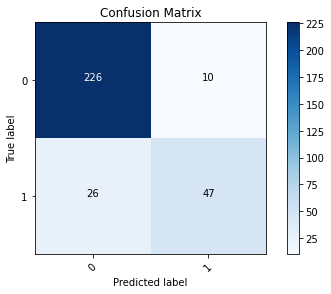

In [ ]:
plot_confusion_matrix(cm=cm,classes=[0,1] ,title='Confusion Matrix')

(3,)
(3,)


Text(0, 0.5, 'True Positive Rate')

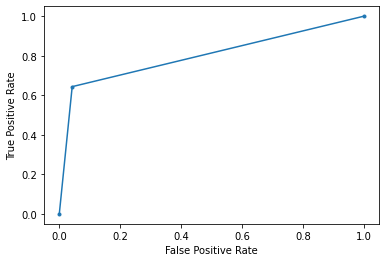

In [ ]:
from sklearn.metrics import roc_curve
#print(prediction.shape)
#prediction = prediction[:,1]
nb_fpr, nb_tpr,_= roc_curve(original,prediction)
#roc_auc = auc(lr_fpr, lr_tpr)
#print(nb_fpr)
#print(nb_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(nb_fpr, nb_tpr,  marker='.', label='Naive Bayes' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
data1=pd.read_csv('.................')
data1.head()
dataset=data1.iloc[:,2].values
yd=data1.iloc[:,1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yt = le.fit_transform(yd)

In [ ]:
y=[]

In [ ]:
for i in range(0,3090):
  if(yt[i]==2):
    y.append(1)
  else:
    y.append(0)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,3090):
  review = re.sub('[^a-zA-Z]', ' ', dataset[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


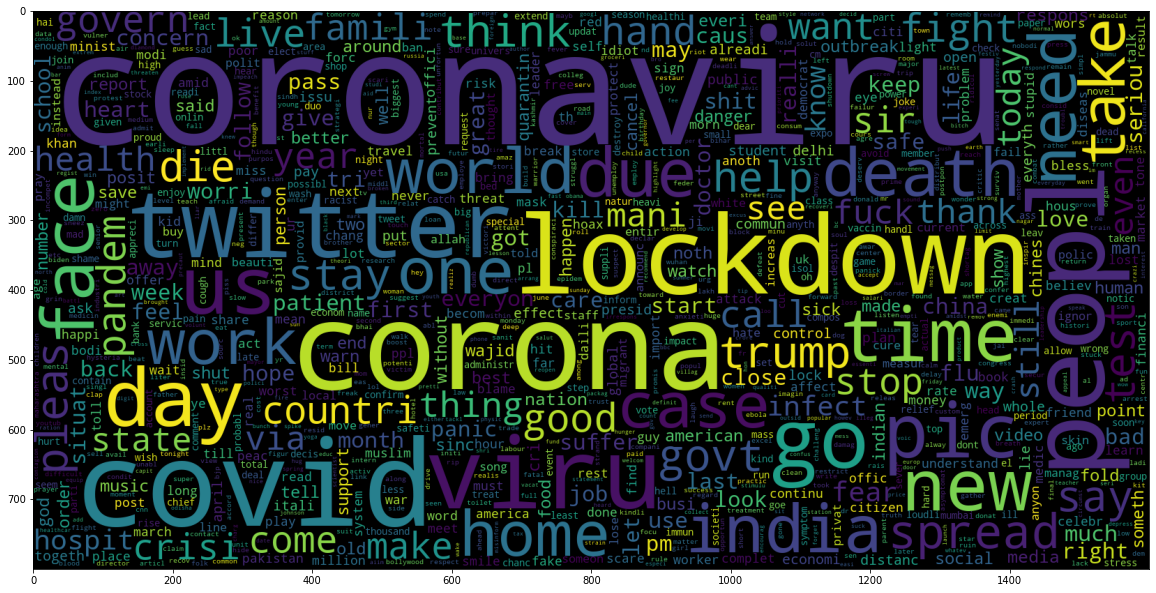

In [ ]:
data_neg = corpus[:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 400)
x = cv.fit_transform(corpus).toarray()
#y = data.iloc[:, 0].values
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=42)
classifier.fit(x_train, y_train)

y_pred = classifier.predict_proba(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train) 
y_pred1=classifier1.predict_proba(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier2=MultinomialNB()
classifier2.fit(x_train, y_train)
y_pred2=classifier2.predict_proba(x_test)

In [ ]:
from sklearn.svm import LinearSVC 
classifier3=LinearSVC(random_state=42)
classifier3.fit(x_train, y_train)
y_pred3=classifier3.decision_function(x_test)

In [ ]:
from sklearn.linear_model import  SGDClassifier
classifier4 =  SGDClassifier(random_state=42)
classifier4.fit(x_train, y_train) 
y_pred4 = classifier4.decision_function(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
classifier5=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier5.fit(x_train, y_train)
y_pred5=classifier5.predict_proba(x_test)

309
(309, 2)
(41,)
(41,)


Text(0, 0.5, 'True Positive Rate')

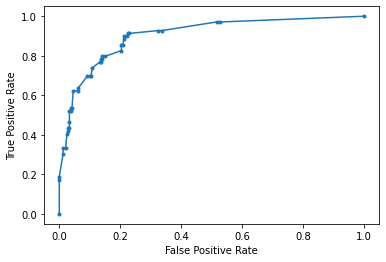

In [ ]:
from sklearn.metrics import roc_curve
print(len(y_pred))

print(y_pred.shape)
y_pred = y_pred[:,1]
rad_fpr, rad_tpr,_= roc_curve(y_test,y_pred)
#roc_auc = auc(lr_fpr, lr_tpr)
print(rad_fpr.shape)
print(rad_tpr.shape)
plt.plot(rad_fpr, rad_tpr,  marker='.', label='Random Forest' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(309,)
(50,)
(50,)


Text(0, 0.5, 'True Positive Rate')

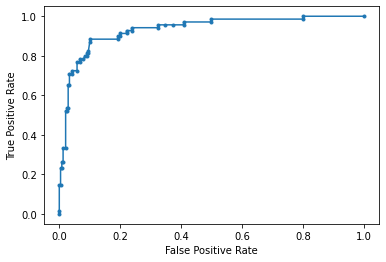

In [ ]:
from sklearn.metrics import roc_curve
y_pred1 = y_pred1[:,1]
print(y_pred1.shape)
lr_fpr, lr_tpr,_= roc_curve(y_test,y_pred1)
#roc_auc = auc(lr_fpr, lr_tpr)
print(lr_fpr.shape)
print(lr_tpr.shape)
plt.plot(lr_fpr, lr_tpr,  marker='.', label='Logistic' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(309, 2)
(56,)
(56,)


Text(0, 0.5, 'True Positive Rate')

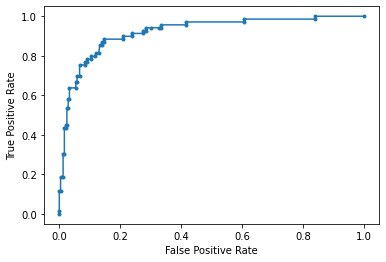

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred2.shape)
y_pred2 = y_pred2[:,1]
nb_fpr, nb_tpr,_= roc_curve(y_test,y_pred2)
#roc_auc = auc(lr_fpr, lr_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(nb_fpr, nb_tpr,  marker='.', label='Naive Bayes' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(309,)
(56,)
(56,)


Text(0, 0.5, 'True Positive Rate')

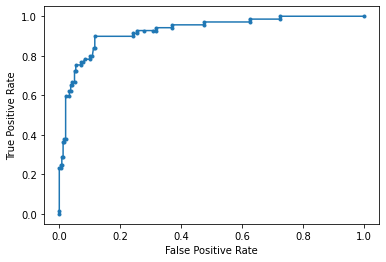

In [ ]:
print(y_pred3.shape)
#y_pred3 = y_pred3[:,1]
svm_fpr, svm_tpr,_= roc_curve(y_test,y_pred3)
#roc_auc = auc(lr_fpr, lr_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(svm_fpr, svm_tpr,  marker='.', label='SVM' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(309,)
(59,)
(59,)


Text(0, 0.5, 'True Positive Rate')

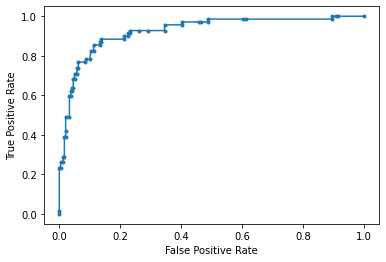

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred4.shape)
#y_pred4 = y_pred4[:,1]
SGD_fpr, SGD_tpr,_= roc_curve(y_test,y_pred4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(SGD_fpr.shape)
print(SGD_tpr.shape)
plt.plot(SGD_fpr, SGD_tpr,  marker='.', label='SGDC' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(309, 2)
(7,)
(7,)


Text(0, 0.5, 'True Positive Rate')

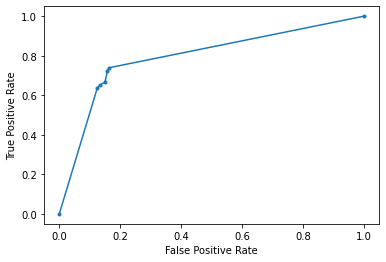

In [ ]:

from sklearn.metrics import roc_curve
print(y_pred5.shape)
y_pred5 = y_pred5[:,1]
dt_fpr, dt_tpr,_= roc_curve(y_test,y_pred5)
#roc_auc = auc(lr_fpr, lr_tpr)
print(dt_fpr.shape)
print(dt_tpr.shape)
plt.plot(dt_fpr, dt_tpr,  marker='.', label='Decision Tree' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(3,)
(3,)


Text(0, 0.5, 'True Positive Rate')

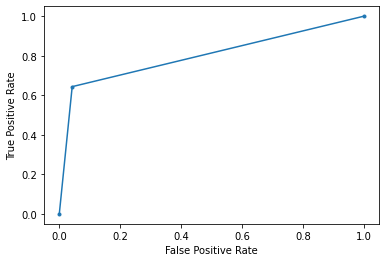

In [ ]:

from sklearn.metrics import roc_curve
#print(y_pred5.shape)
#y_pred5 = y_pred5[:,1]
ls_fpr, ls_tpr,_= roc_curve(original,prediction)
#roc_auc = auc(lr_fpr, lr_tpr)
print(ls_fpr.shape)
print(ls_tpr.shape)
plt.plot(ls_fpr, ls_tpr,  marker='.', label='LSTM' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

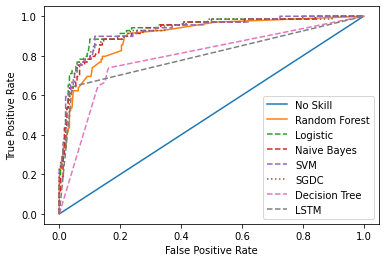

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)


plt.plot(ns_fpr, ns_tpr, linestyle='-', label='No Skill')
plt.plot(rad_fpr, rad_tpr,  linestyle='-', label='Random Forest' )
plt.plot(lr_fpr, lr_tpr,  linestyle='--', label='Logistic' )
plt.plot(nb_fpr, nb_tpr,  linestyle='--', label='Naive Bayes' )
plt.plot(svm_fpr, svm_tpr,  linestyle='--', label='SVM' )
plt.plot(SGD_fpr, SGD_tpr,  linestyle='dotted', label='SGDC' )
plt.plot(dt_fpr, dt_tpr,  linestyle='--', label='Decision Tree' )
plt.plot(ls_fpr, ls_tpr,  linestyle='--', label='LSTM' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()